In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 30)

In [3]:
df = pd.read_csv("bank-full.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


### Checking for duplicates

In [5]:
df.duplicated().unique()

array([False])

### Understanding individual column

In [6]:
df.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [7]:
df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [8]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [9]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [10]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [11]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

In [12]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [13]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [14]:

df.contact.sample(10)

38414    cellular
35467    cellular
6845      unknown
2951      unknown
10429     unknown
30313    cellular
42445    cellular
31130    cellular
36410    cellular
25808    cellular
Name: contact, dtype: object

In [15]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [16]:
df.day.unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [17]:
len(df.day.unique())

31

In [18]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [19]:
df.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

In [20]:
df.campaign.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [21]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [22]:
df[~(df.pdays == -1)].pdays.describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [23]:
df.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [24]:
df.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [25]:
df.y.unique()

array(['no', 'yes'], dtype=object)

## Analyzing each column

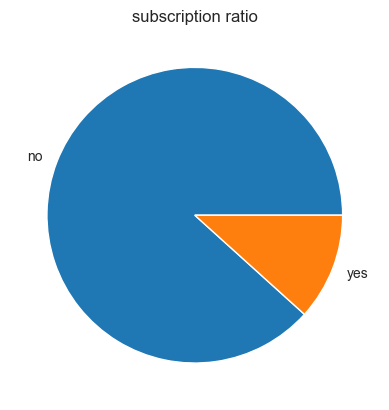

In [26]:
y_counts = df.y.value_counts()
plt.pie(y_counts.values, labels=y_counts.index)
plt.title('subscription ratio');

In [27]:
y_counts

y
no     39922
yes     5289
Name: count, dtype: int64

* There is a visible class imbalance

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### 1. 'age' column

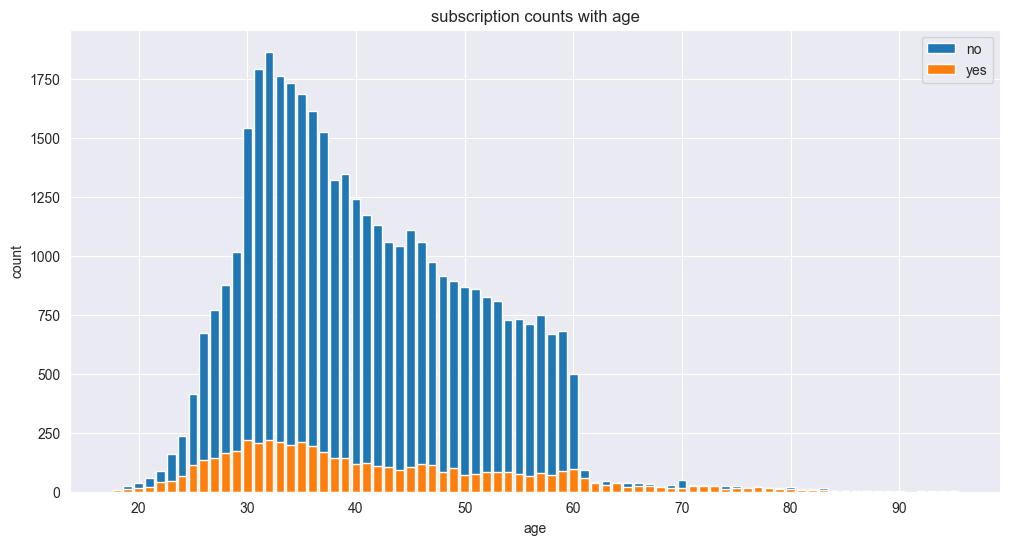

In [29]:
age_yes_counts = df[df.y == 'yes'].groupby('age')['y'].count()
age_no_counts = df[df.y == 'no'].groupby('age')['y'].count()

plt.figure(figsize=(12,6))
plt.bar(x=age_no_counts.index, height=age_no_counts.values)
plt.bar(x=age_yes_counts.index, height=age_yes_counts.values)
plt.xlabel('age')
plt.ylabel('count')
plt.title('subscription counts with age')
plt.legend(['no','yes']);

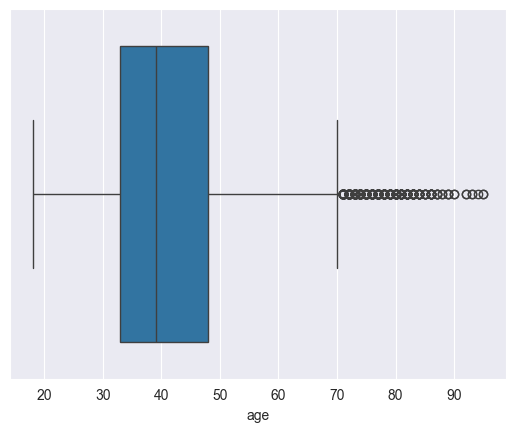

In [39]:
sns.boxplot(df.age, orient='h');

In [183]:
df[df.age > 70]['y'].count()

np.int64(487)

* There are some outliers towards right side of the graph

#### 2. 'marital' column

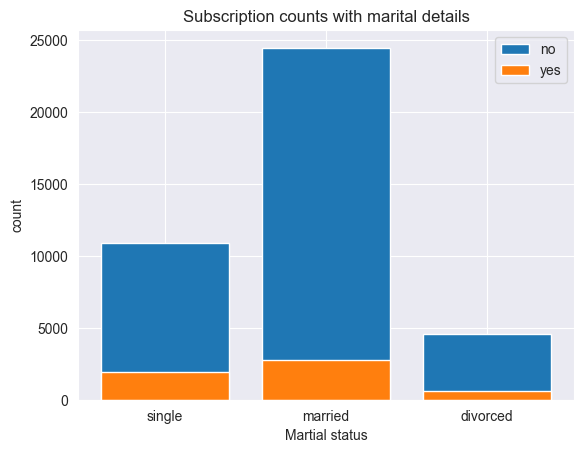

In [184]:
marital_yes_counts = df[df.y == 'yes'].groupby('marital')['y'].count().reindex(['single', 'married', 'divorced'])
marital_no_counts = df[df.y == 'no'].groupby('marital')['y'].count().reindex(['single', 'married', 'divorced'])

plt.bar(x=marital_no_counts.index, height=marital_no_counts.values)
plt.bar(x=marital_yes_counts.index, height=marital_yes_counts.values)
plt.legend(['no', 'yes'])
plt.xlabel('Martial status')
plt.ylabel('count')
plt.title('Subscription counts with marital details');

#### 3. 'job' column

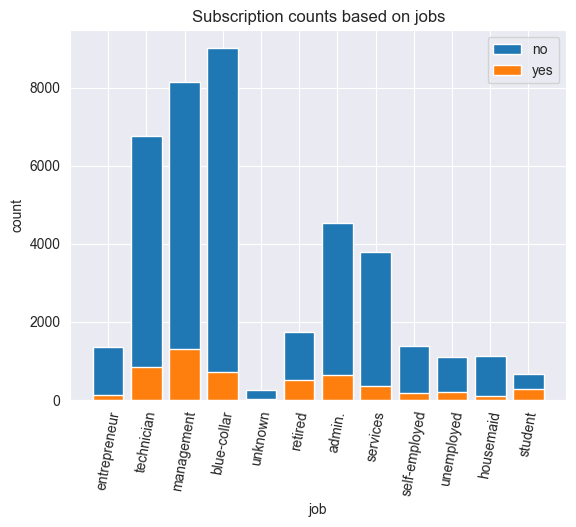

In [30]:
job_yes_counts = df[df.y == 'yes'].groupby('job')['y'].count().reindex(['entrepreneur', 'technician','management', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'])
job_no_counts = df[df.y == 'no'].groupby('job')['y'].count().reindex(['entrepreneur', 'technician','management', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'])

plt.bar(x=job_no_counts.index, height=job_no_counts.values)
plt.bar(x=job_yes_counts.index, height=job_yes_counts.values)
plt.title('Subscription counts based on jobs')
plt.xlabel('job')
plt.ylabel('count')
plt.legend(['no','yes'])
plt.xticks(rotation=80);

In [186]:
unknown_perc = df[df.job == 'unknown']['job'].count() / len(df) * 100
print('unknown job percentage =', unknown_perc)

unknown job percentage = 0.6370131162770122


* Rows with 'unknown' for job could be an outlier

#### 4. 'education' column

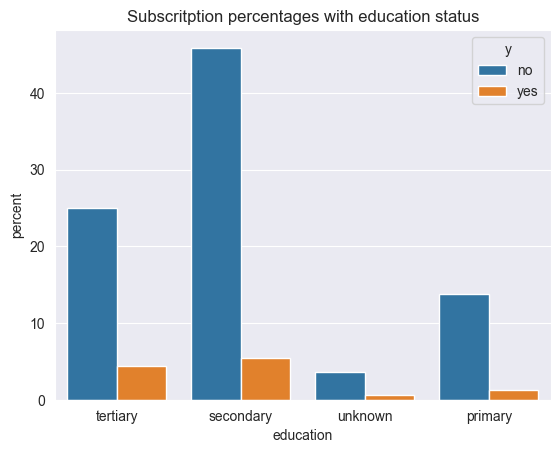

In [31]:
sns.countplot(x=df.education, hue=df.y, stat='percent')
plt.title('Subscritption percentages with education status' );

#### 5. 'default' column

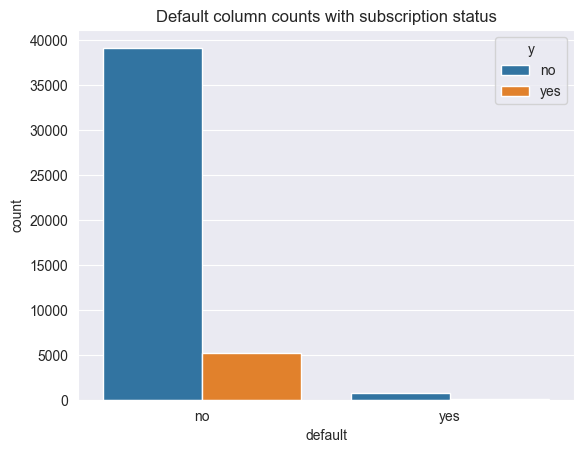

In [32]:
sns.countplot(x=df.default, hue=df.y)
plt.title('Default column counts with subscription status');

In [189]:
print('Proportion of default value "yes" =', (df[df.default=='yes']['default'].count() / len(df)))

Proportion of default value "yes" = 0.018026586450200173


#### 6. 'balance' column

In [190]:
df.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

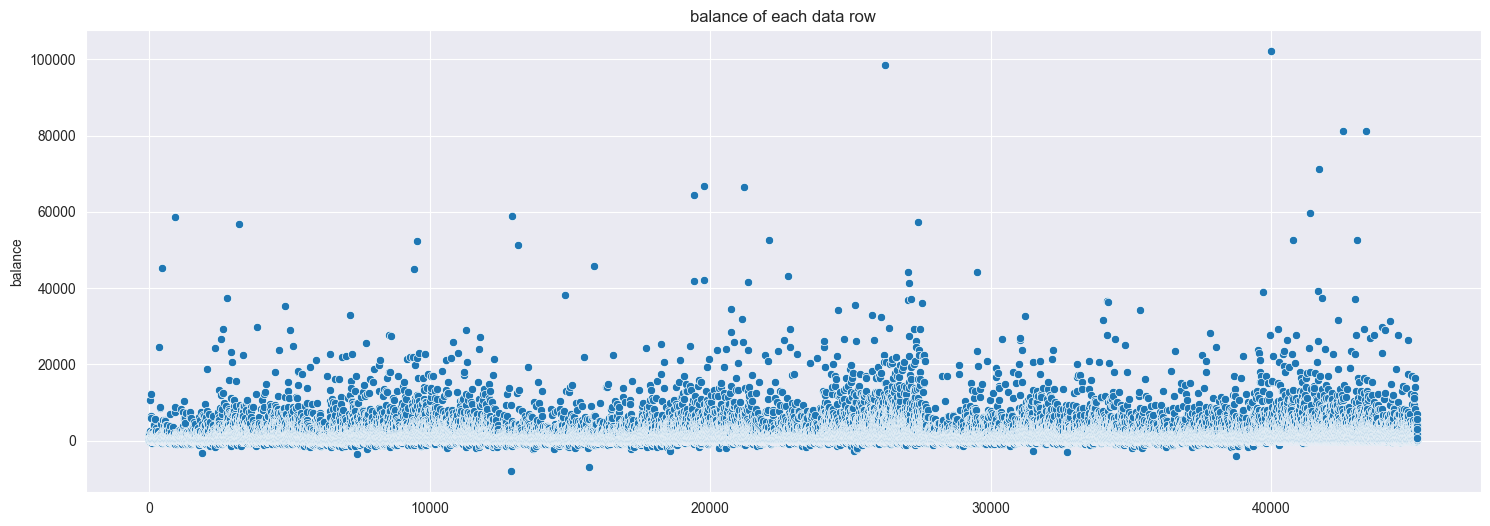

In [191]:
plt.figure(figsize=(18,6))
sns.scatterplot(y=df.balance, x=range(len(df)))
plt.title('balance of each data row');

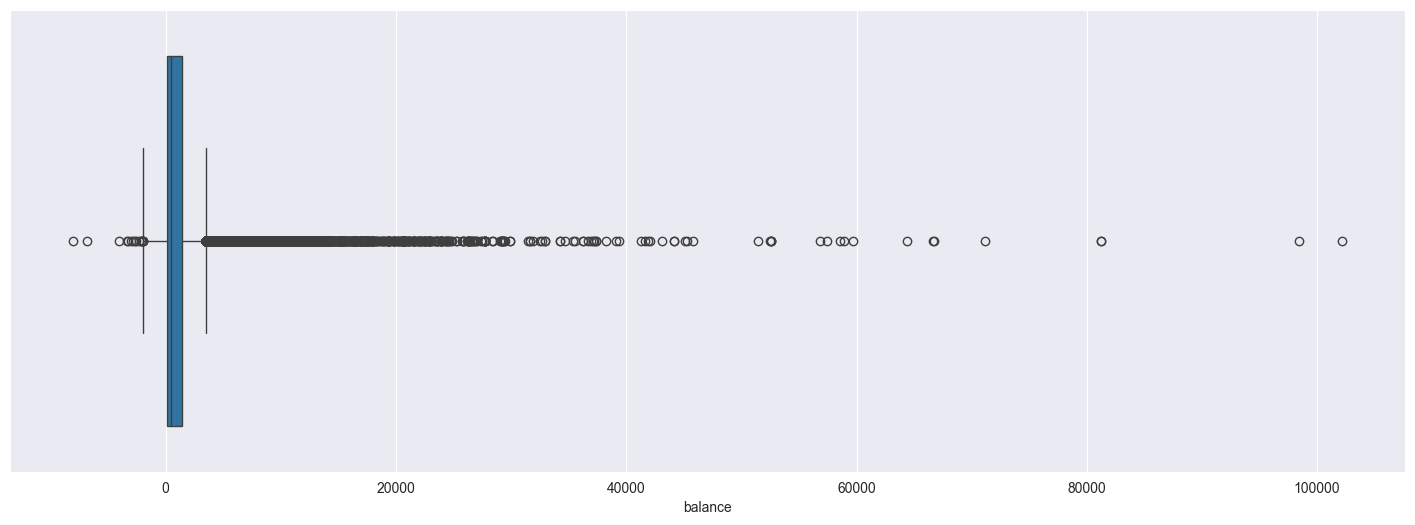

In [41]:
plt.figure(figsize=(18,6))

sns.boxplot(df.balance, orient="h");

In [47]:
# Calculate IQR
Q1 = df['balance'].quantile(0.25)
Q3 = df['balance'].quantile(0.75)
IQR = Q3 - Q1

# Outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['balance'] < -2000) | (df['balance'] > 40000)]

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("No of outliers:")
print(outliers['balance'].count())

Lower Bound: -1962.0
Upper Bound: 3462.0
No of outliers:
42


* There are outliers in the 'balance' column

#### 7. 'housing' column 

In [194]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

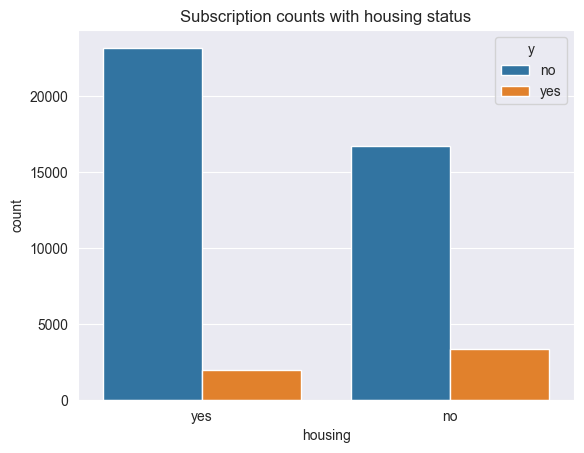

In [33]:
sns.countplot(x=df.housing, hue=df.y)
plt.title('Subscription counts with housing status');

#### 7. 'loan' column 

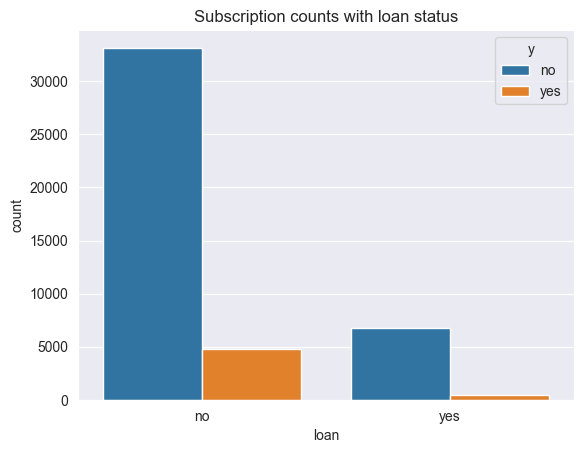

In [34]:
sns.countplot(x=df.loan, hue=df.y)
plt.title('Subscription counts with loan status');

#### 9. 'contact' column

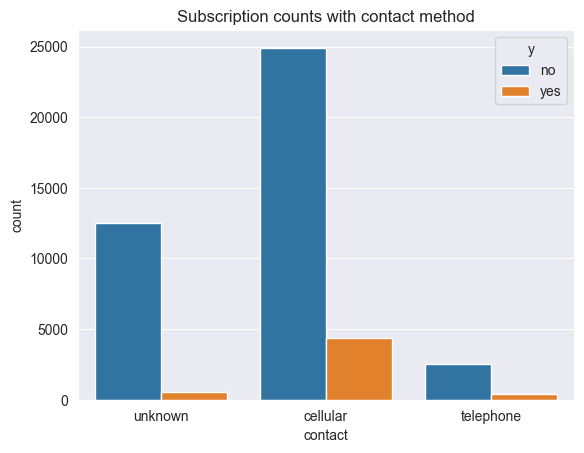

In [35]:
sns.countplot(x=df.contact, hue=df.y)
plt.title('Subscription counts with contact method');

#### 10.'day' column

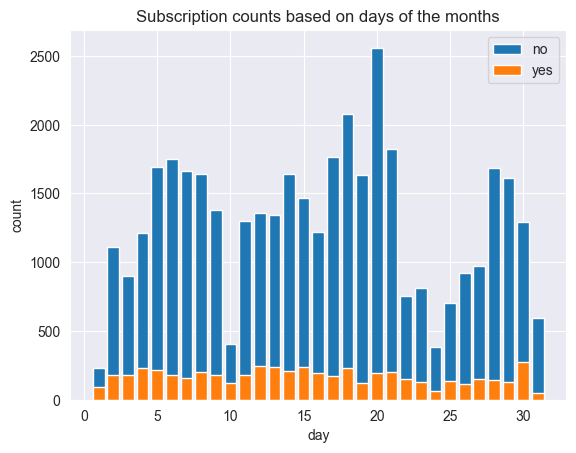

In [36]:
day_yes_counts = df[df.y == 'yes']['day'].value_counts().reindex(range(1,32))
day_no_counts = df[df.y == 'no']['day'].value_counts().reindex(range(1,32))

plt.bar(x=day_no_counts.index, height=day_no_counts.values)
plt.bar(x=day_yes_counts.index, height=day_yes_counts.values)
plt.title('Subscription counts based on days of the months')
plt.xlabel("day")
plt.ylabel("count")
plt.legend(['no','yes']);

#### 11. 'month' column

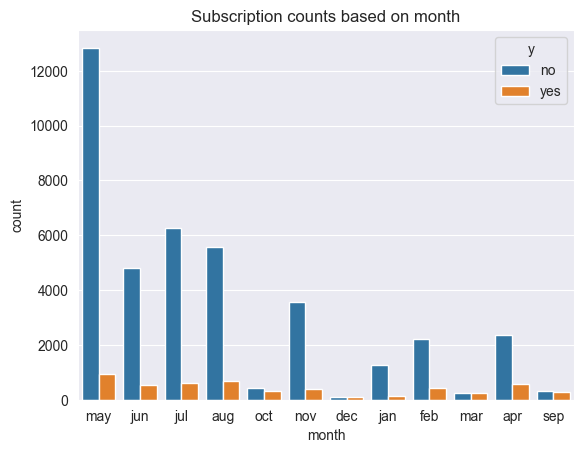

In [38]:
sns.countplot(x=df.month, hue=df.y)
plt.title('Subscription counts based on month');

#### 12. 'duration' column

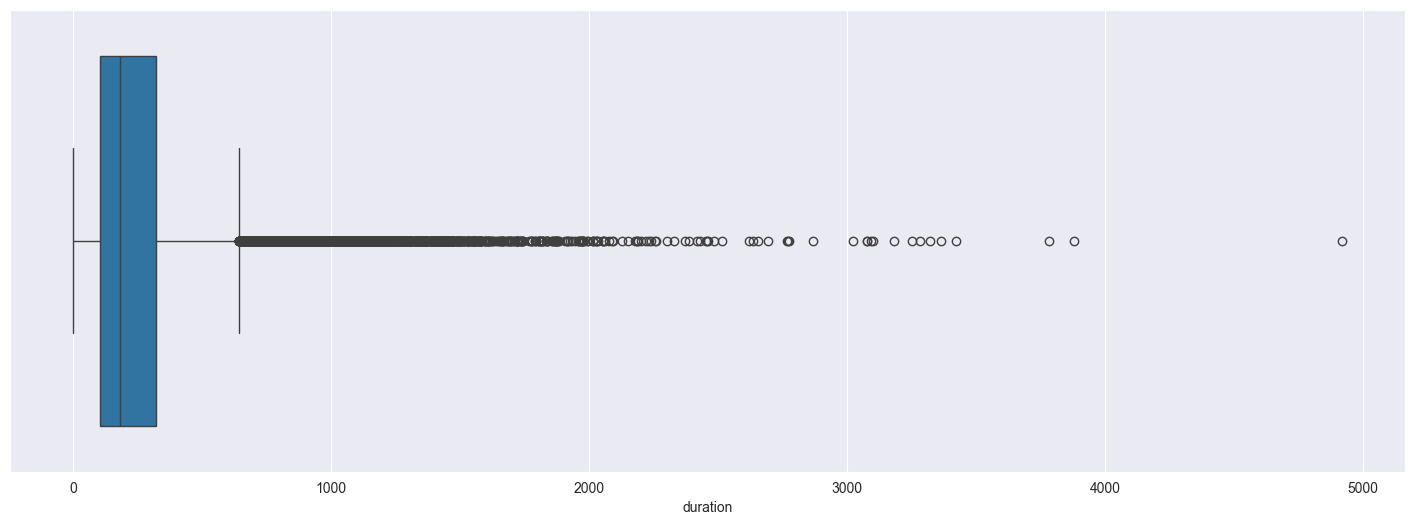

In [48]:
plt.figure(figsize=(18,6))
sns.boxplot(df.duration, orient="h");

In [201]:
df[df.duration > 2000]['y'].count()

np.int64(59)

* There are outliers in this column

#### 13. 'campaign' column

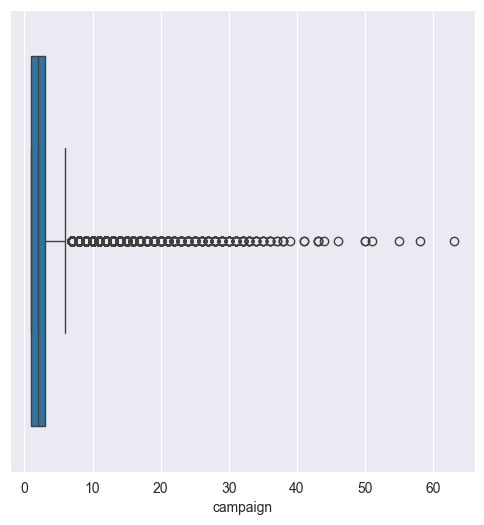

In [49]:
plt.figure(figsize=(6,6))
sns.boxplot(df.campaign, orient="h");

In [203]:
df[df.campaign > 35]['y'].count()

np.int64(23)

#### 14. 'pdays' column

In [204]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

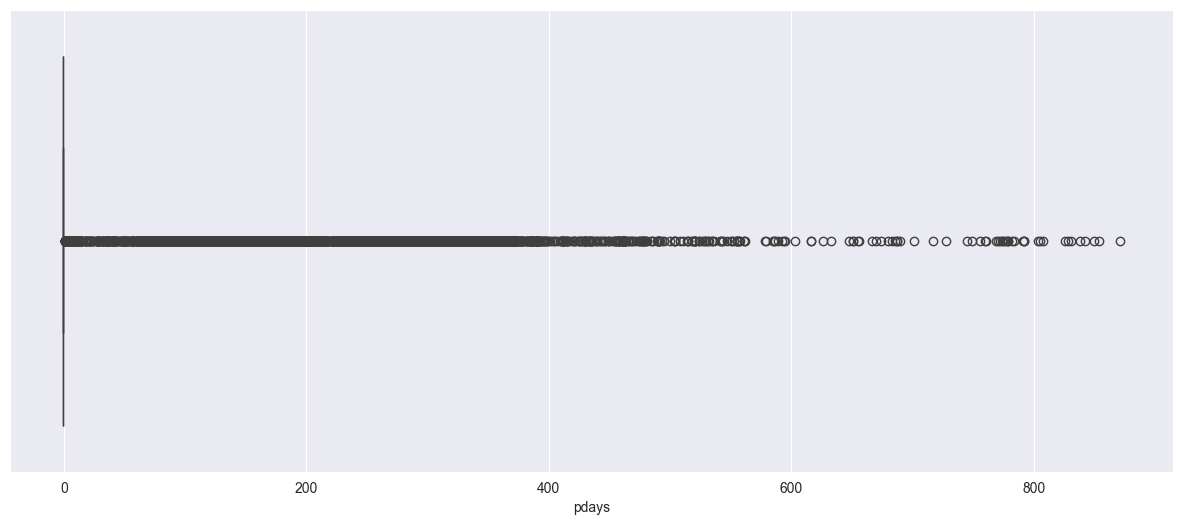

In [50]:
plt.figure(figsize=(15,6))
sns.boxplot(df.pdays, orient="h");

In [206]:
df[df.pdays > 600]['y'].count()

np.int64(52)

* There are some outliers in this column

#### 15. 'previous' column

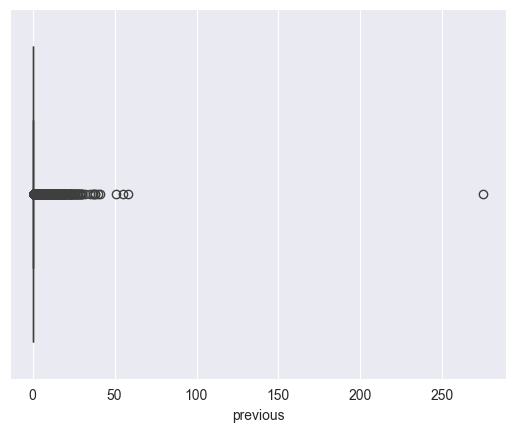

In [51]:
sns.boxplot(df.previous, orient="h");

In [208]:
df[df.previous > 25]['y'].count()

np.int64(28)

* There are outliers in this column

#### 16. 'poutcome' column

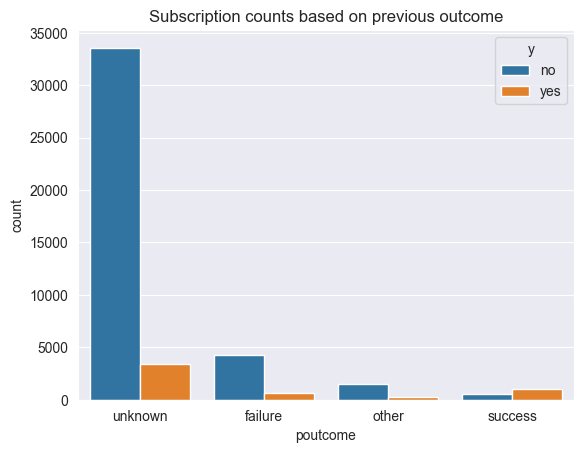

In [209]:
sns.countplot(x=df.poutcome, hue=df.y)
plt.title('Subscription counts based on previous outcome');

### Transforming month and day into 1 column

In [210]:
def month_day_transf(month, day):
    score = 0
    if month == 'jan':
        score = 365
    elif month == 'feb':
        score = 334
    elif month == 'mar':
        score = 306
    elif month == 'apr':
        score = 275
    elif month == 'may':
        score = 245
    elif month == 'jun':
        score = 214
    elif month == 'jul':
        score = 184
    elif month == 'aug':
        score = 153
    elif month == 'sep':
        score = 122
    elif month == 'oct':
        score = 92
    elif month == 'nov':
        score = 61
    elif month == 'dec':
        score = 31

    score -= day
    return score

In [211]:
df['lcdays'] = df.apply(lambda row: month_day_transf(row['month'], row['day']), axis=1)

In [212]:
df = df.drop(columns=['month', 'day'])
df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,lcdays
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no,240
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no,240
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no,240
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no,240
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no,240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,yes,44
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,yes,44
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,yes,44
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,no,44


### Removing outliers

In [214]:
df[(df.age > 70) | (df['balance'] < -2000) | (df['balance'] > 40000) | (df.duration > 2000) | (df.campaign > 35) | (df.pdays > 600) | (df.previous > 20)]['y'].value_counts()

y
no     435
yes    278
Name: count, dtype: int64

In [215]:
drop_count = df[(df.age > 70) | (df['balance'] < -2000) | (df['balance'] > 40000) | (df.duration > 2000) | (df.campaign > 35) | (df.pdays > 600) | (df.previous > 20)]['y'].count()
df = df[~((df.age > 70) | (df['balance'] < -2000) | (df['balance'] > 40000) | (df.duration > 2000) | (df.campaign > 35) | (df.pdays > 600) | (df.previous > 20))].copy()
print('drop count =', drop_count)

drop count = 713


### Rescaling numeric values

In [216]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

#### Heatmap

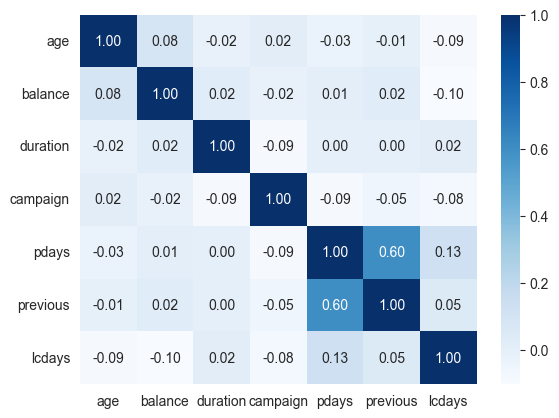

In [217]:
numeric_cols = df.select_dtypes(['int', 'float']).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, cmap="Blues", annot=True, fmt='.2f');

#### Replacing yes and no with 1 and 0 in input columns

In [218]:
df['default'] = df['default'].replace({'yes':1, 'no':0})
df['housing'] = df['housing'].replace({'yes':1, 'no':0})
df['loan'] = df['loan'].replace({'yes':1, 'no':0})
df

C:\Users\sayur\AppData\Local\Temp\ipykernel_3840\1578657314.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['default'] = df['default'].replace({'yes':1, 'no':0})
C:\Users\sayur\AppData\Local\Temp\ipykernel_3840\1578657314.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['housing'] = df['housing'].replace({'yes':1, 'no':0})
C:\Users\sayur\AppData\Local\Temp\ipykernel_3840\1578657314.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, 

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,lcdays
0,0.769231,management,married,tertiary,0,0.099674,1,0,unknown,0.130893,0.000000,0.000000,0.00,unknown,no,0.668524
1,0.500000,technician,single,secondary,0,0.048568,1,0,unknown,0.075727,0.000000,0.000000,0.00,unknown,no,0.668524
2,0.288462,entrepreneur,married,secondary,0,0.047915,1,1,unknown,0.038114,0.000000,0.000000,0.00,unknown,no,0.668524
3,0.557692,blue-collar,married,unknown,0,0.084274,1,0,unknown,0.046138,0.000000,0.000000,0.00,unknown,no,0.668524
4,0.288462,unknown,single,unknown,0,0.047891,0,0,unknown,0.099298,0.000000,0.000000,0.00,unknown,no,0.668524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,0.096154,student,single,tertiary,0,0.050598,0,0,cellular,0.133400,0.000000,0.000000,0.00,unknown,yes,0.122563
45205,0.134615,technician,single,secondary,0,0.060075,0,1,cellular,0.193581,0.029412,0.000000,0.00,unknown,yes,0.122563
45206,0.634615,technician,married,tertiary,0,0.067811,0,0,cellular,0.489970,0.058824,0.000000,0.00,unknown,yes,0.122563
45209,0.750000,blue-collar,married,secondary,0,0.064015,0,0,telephone,0.254764,0.088235,0.000000,0.00,unknown,no,0.122563


#### Without any encoding

In [219]:
df.to_csv('dataset3.csv', index=False)

#### One hot encoding

In [220]:
# categorical_cols = ['job', 'marital', 'education', 'contact', 'poutcome']

# df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
# df = df.replace({True: 1, False: 0})

# df['y'] = df['y'].replace({'yes':1, 'no':0})
# df.to_csv('dataset1.csv', index=False)

C:\Users\sayur\AppData\Local\Temp\ipykernel_3840\680180035.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})
C:\Users\sayur\AppData\Local\Temp\ipykernel_3840\680180035.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'] = df['y'].replace({'yes':1, 'no':0})


#### Label encoding


In [146]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Initialize the encoder
le = LabelEncoder()

# 'job', 'marital', 'education', 'contact', 'poutcome'
# Fit and transform
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['contact'] = le.fit_transform(df['contact'])
df['poutcome'] = le.fit_transform(df['poutcome'])

scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y,lcdays
0,0.769231,0.363636,0.5,0.666667,0.0,0.099674,1.0,0.0,1.0,0.130893,0.000000,0.000000,0.00,1.000000,no,0.668524
1,0.500000,0.818182,1.0,0.333333,0.0,0.048568,1.0,0.0,1.0,0.075727,0.000000,0.000000,0.00,1.000000,no,0.668524
2,0.288462,0.181818,0.5,0.333333,0.0,0.047915,1.0,1.0,1.0,0.038114,0.000000,0.000000,0.00,1.000000,no,0.668524
3,0.557692,0.090909,0.5,1.000000,0.0,0.084274,1.0,0.0,1.0,0.046138,0.000000,0.000000,0.00,1.000000,no,0.668524
4,0.288462,1.000000,1.0,1.000000,0.0,0.047891,0.0,0.0,1.0,0.099298,0.000000,0.000000,0.00,1.000000,no,0.668524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,0.096154,0.727273,1.0,0.666667,0.0,0.050598,0.0,0.0,0.0,0.133400,0.000000,0.000000,0.00,1.000000,yes,0.122563
45205,0.134615,0.818182,1.0,0.333333,0.0,0.060075,0.0,1.0,0.0,0.193581,0.029412,0.000000,0.00,1.000000,yes,0.122563
45206,0.634615,0.818182,0.5,0.666667,0.0,0.067811,0.0,0.0,0.0,0.489970,0.058824,0.000000,0.00,1.000000,yes,0.122563
45209,0.750000,0.090909,0.5,0.333333,0.0,0.064015,0.0,0.0,0.5,0.254764,0.088235,0.000000,0.00,1.000000,no,0.122563


In [147]:
df['y'] = df['y'].replace({'yes':1, 'no':0})

C:\Users\sayur\AppData\Local\Temp\ipykernel_3840\4131214356.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['y'] = df['y'].replace({'yes':1, 'no':0})


In [148]:
df.to_csv('dataset2.csv', index=False)